In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import tessreduce as tr
from tessreduce import *
import matplotlib.path as pat

In [2]:
obs = tr.sn_lookup('SN2020aakp')

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|        1 | False    |               -819 |
|        2 | False    |               -790 |
|        3 | False    |               -762 |
|        4 | False    |               -734 |
|        5 | False    |               -708 |
|        6 | False    |               -681 |
|        7 | False    |               -655 |
|        8 | False    |               -629 |
|        9 | False    |               -603 |
|       10 | False    |               -576 |
|       11 | False    |               -547 |
|       12 | False    |               -518 |
|       13 | False    |               -489 |
|       27 | False    |               -111 |
|       28 | False    |                -84 |
|       29 | False    |                -57 |
|       30 | False    |                -28 |
|       31 | True     |                  0 |
|       33 | False    |                 29 |
|       34

getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is below -30 dec, calibrating to SkyMapper photometry.


<IPython.core.display.Javascript object>


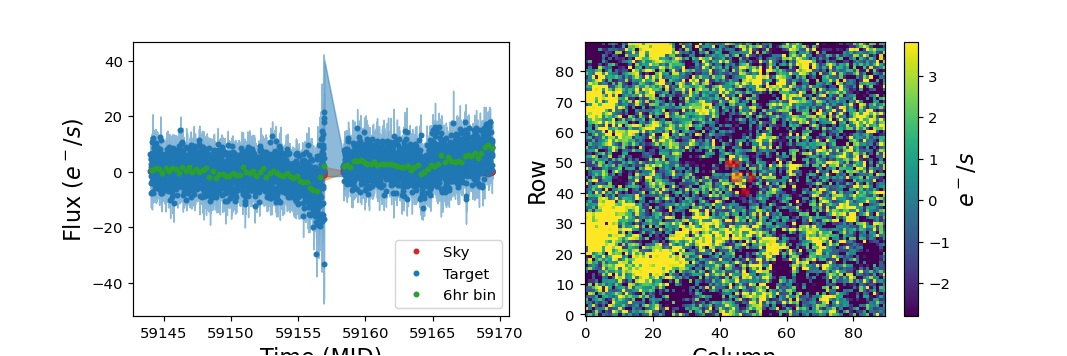

In [3]:
tess = tr.tessreduce(obs_list=obs,reduce=True,plot=True)
#tess.reduce(align=False,diff=False)

<IPython.core.display.Javascript object>


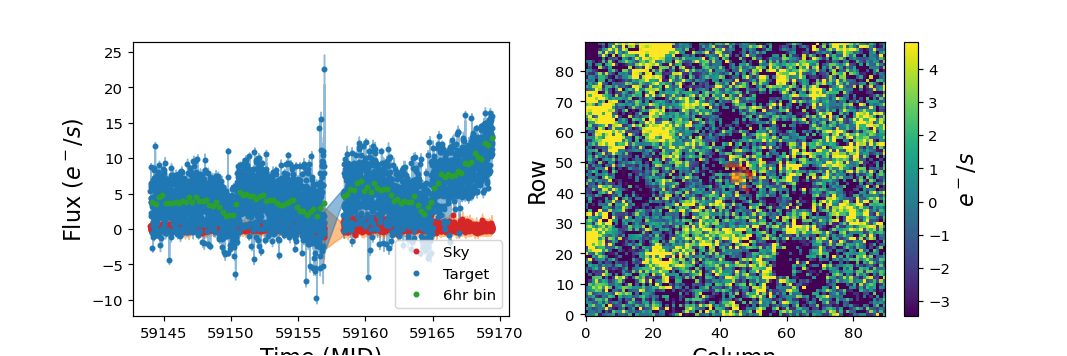

(array([[5.91440171e+04, 5.91440241e+04, 5.91440310e+04, ...,
         5.91694266e+04, 5.91694335e+04, 5.91694405e+04],
        [5.37612380e+00, 4.43140423e+00, 8.79430660e+00, ...,
         1.12456086e+01, 1.59284164e+01, 1.42263906e+01],
        [7.83839577e-01, 6.27087079e-01, 5.23421638e-01, ...,
         5.68757087e-01, 7.59441721e-01, 5.88952242e-01]]),
 array([[ 5.91440171e+04,  5.91440241e+04,  5.91440310e+04, ...,
          5.91694266e+04,  5.91694335e+04,  5.91694405e+04],
        [ 4.21444302e-01,  2.86338515e-01,  5.51678725e-01, ...,
         -8.68129611e-02,  1.63430583e-01,  3.97343671e-02],
        [ 7.83839577e-01,  6.27087079e-01,  5.23421638e-01, ...,
          5.68757087e-01,  7.59441721e-01,  5.88952242e-01]]))

In [8]:
tess.diff_lc(phot_method='psf',plot=True,psf_snap='ref')

In [9]:
import numpy as np
import itertools
from scipy.optimize import least_squares

def polynomial_surface(x, y, coeffs, order):
    """Evaluate an n-order polynomial surface."""
    z = np.zeros_like(x)
    index = 0
    for i in range(order + 1):
        for j in range(order + 1 - i):
            z += coeffs[index] * (x ** i) * (y ** j)
            index += 1
    return z

def fit_polynomial_surface(x, y, z, order):
    """Fit an n-order polynomial surface to given 3D data."""
    def residuals(coeffs):
        return polynomial_surface(x, y, coeffs, order) - z
    
    num_coeffs = (order + 1) * (order + 2) // 2  # Number of terms in a 2D polynomial
    initial_guess = np.zeros(num_coeffs)
    result = least_squares(residuals, initial_guess)
    return result.x


# Generate sample data
np.random.seed(42)
x_data = np.random.uniform(-5, 5, 100)
y_data = np.random.uniform(-5, 5, 100)
z_data = 3*x_data**2 + 2*y_data + 5 + np.random.normal(0, 1, 100)  # Example quadratic surface

# Fit polynomial surface
order = 2
coeffs = fit_polynomial_surface(x_data, y_data, z_data, order)
print("Fitted Coefficients:", coeffs)

Fitted Coefficients: [ 4.89569887e+00  2.06901541e+00  2.21758103e-02 -3.08797596e-02
  2.44918637e-04  3.00181532e+00]


In [11]:
x_data.shape

(100,)

<IPython.core.display.Javascript object>


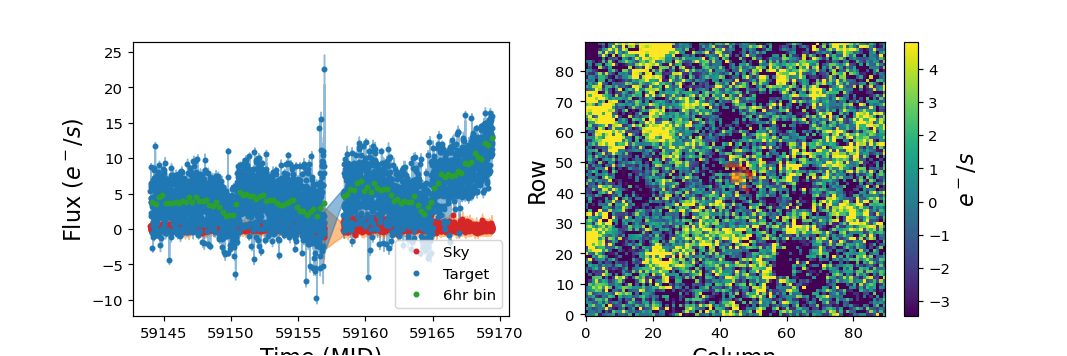

(array([[5.91440171e+04, 5.91440241e+04, 5.91440310e+04, ...,
         5.91694266e+04, 5.91694335e+04, 5.91694405e+04],
        [5.37612380e+00, 4.43140423e+00, 8.79430660e+00, ...,
         1.12456086e+01, 1.59284164e+01, 1.42263906e+01],
        [7.83839577e-01, 6.27087079e-01, 5.23421638e-01, ...,
         5.68757087e-01, 7.59441721e-01, 5.88952242e-01]]),
 array([[ 5.91440171e+04,  5.91440241e+04,  5.91440310e+04, ...,
          5.91694266e+04,  5.91694335e+04,  5.91694405e+04],
        [ 4.21444302e-01,  2.86338515e-01,  5.51678725e-01, ...,
         -8.68129611e-02,  1.63430583e-01,  3.97343671e-02],
        [ 7.83839577e-01,  6.27087079e-01,  5.23421638e-01, ...,
          5.68757087e-01,  7.59441721e-01,  5.88952242e-01]]))

In [5]:
tess.diff_lc(phot_method='psf',plot=True,snap='brightest')

made reference
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


<IPython.core.display.Javascript object>


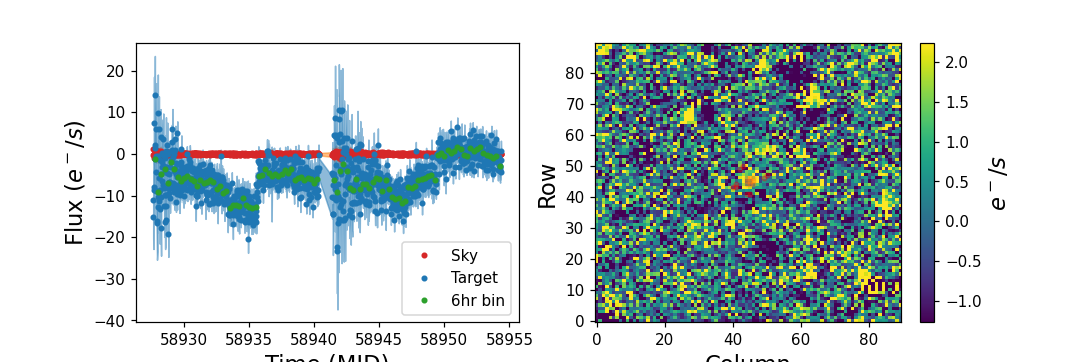

In [3]:
tess = tr.tessreduce(tpf='../../SN_individual/2020ghq/s23.fits',reduce=True,plot=True)
#tess.reduce(align=False,diff=False)

In [4]:
from sourcedetect import sourcedetectrcedetect

In [16]:
type(a)

sourcedetect.sourcedetect.SourceDetect

In [29]:
a = sourcedetect.SourceDetect(tess.bkg,run=True)
a

In [30]:
a.events

,xcentroid,ycentroid,n_detections,objid,psflike,xint,yint,variability,max_flux,start_frame,end_frame
0,4.001621,2.002532,1,5,1.000000,4,2,unsure,0,10,10
1,4.002898,3.002387,1,96,1.000000,4,3,unsure,1,15,15
2,4.002781,3.003250,1,117,1.000000,4,3,unsure,2,16,16
3,4.003222,3.002481,1,138,1.000000,4,3,unsure,3,17,17
4,5.003698,3.003440,1,159,1.000000,5,3,unsure,4,18,18
...,...,...,...,...,...,...,...,...,...,...,...
121698,80.000641,84.005590,1,126115,0.811335,80,84,unsure,121698,820,820
121699,68.000804,83.994367,1,126116,0.801608,68,84,unsure,121699,821,821
121700,72.004482,84.003342,1,126117,0.804572,72,84,unsure,121700,821,821
121701,76.004266,84.006100,1,126118,0.806258,76,84,unsure,121701,821,821


In [ ]:
b = a.events.loc[a.events['psflike'] > 0.9]
plt.figure()
plt.imshow(tess.bkg[frame])
print(len(b))
plt.plot(b['xcentroid'],b['ycentroid'],'.')
#plt.plot(a.events['xcentroid'],a.events['ycentroid'],'.')
#plt.plot(b['xcentroid'],b['ycentroid'],'r.')

<IPython.core.display.Javascript object>


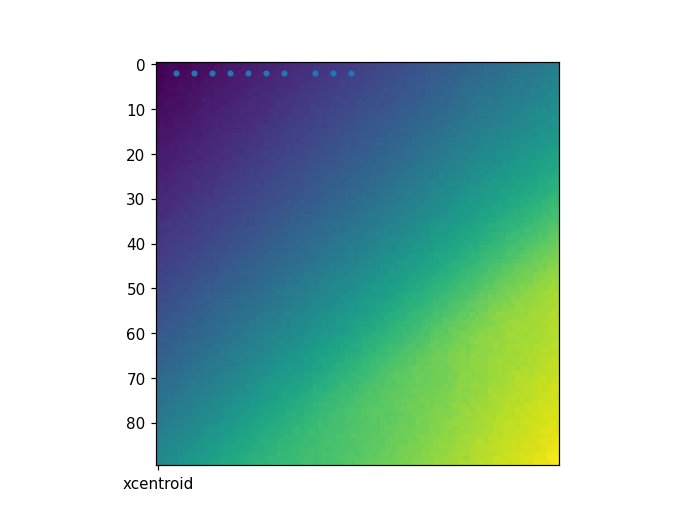

10


ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

In [39]:
frame = 10
b = a.events.loc[a.events['start_frame'] == frame]
plt.figure()
plt.imshow(tess.bkg[frame])
print(len(b))
plt.plot(b['xcentroid'],b['ycentroid'],'.')
plt.plot(['xcentroid'],b['ycentroid'],'.')

In [3]:
test = tess.tpf.flux.value - tess.bkg


In [4]:
ap = np.zeros((tess.flux.shape[0]*1000,tess.flux.shape[1]*1000))

In [5]:
ap[450:790,450:790] = 1

In [ ]:
ap.shape

In [ ]:
plt.figure()
plt.imshow(ap)

<IPython.core.display.Javascript object>

In [21]:
i =400
square = np.zeros((4,2))
square[0,:] = [44-.5-tess.shift[i,0],44-.5-tess.shift[i,1]]
square[1,:] = [44-.5-tess.shift[i,0],47-.5-tess.shift[i,1]]
square[2,:] = [47-.5-tess.shift[i,0],47-.5-tess.shift[i,1]]
square[3,:] = [47-.5-tess.shift[i,0],44-.5-tess.shift[i,1]]
path = pat.Path(square)

In [12]:
from shapely.geometry import Polygon

In [22]:
p0 = Polygon(square)

In [23]:
square = np.zeros((4,2))
square[0,:] = [43-.5,43-.5]
square[1,:] = [43-.5,44-.5]
square[2,:] = [44-.5,44-.5]
square[3,:] = [44-.5,43-.5]

p1 = Polygon(square)

In [24]:
a = p0.intersection(p1)

In [25]:
a.area

0.0

In [34]:
p0.overlaps(p1)

False

In [30]:
p1.area

1.0

In [36]:
p0.bounds

(43.49871460423617, 43.50986395149633, 46.49871460423617, 46.50986395149633)

In [37]:
p1.bounds

(42.5, 42.5, 43.5, 43.5)